# Classifying Bristol Neighbourhoods from Airbnb data

Being able to identify a neighbourhood from Airbnb data could help gain insight on what features contribute towards distinguish one neighbourhood over another. Such an analysis could be carried out in a larger study in order to identify up-and-coming, or gentrified, neighbourhoods.

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [89]:
df = pd.read_csv("BristolAirbnbListings.csv")
len(df)

2375

In [90]:
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
postcode                           object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                       object
bathrooms                          object
bedrooms                           object
beds                               object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
review_scores_rating               object
review_scores_accuracy             object
review_scores_cleanliness          object
review_scores_checkin              object
review_scores_communication       

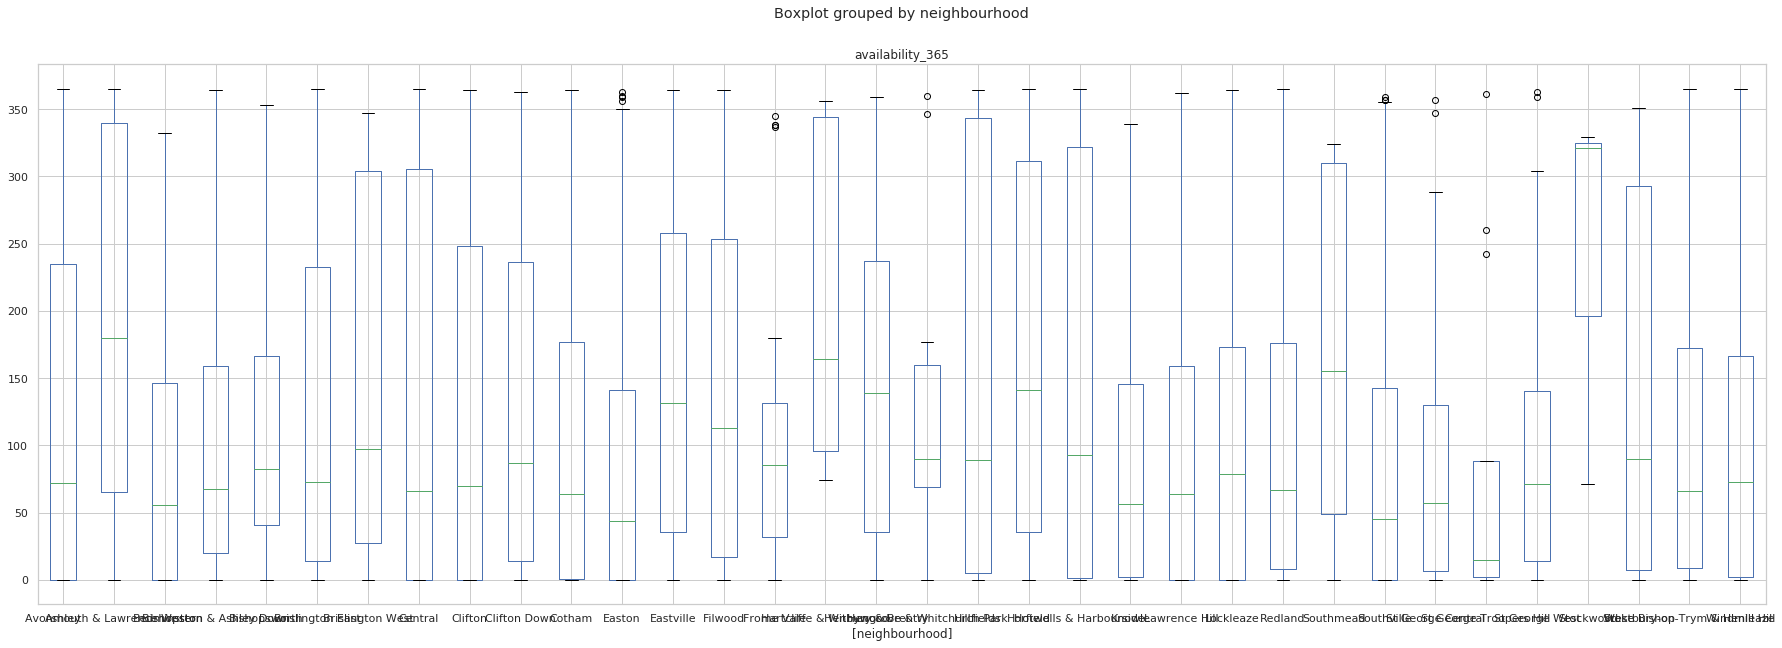

In [193]:
df.boxplot(column=['availability_365'], by=['neighbourhood'], figsize=[30,10])


In [186]:
# plt.figure(figsize=(10,10))
# ax = sns.boxplot(x=df.neighbourhood, y=df.availability_365, orient='v')
# # ax = sns.swarmplot(x=df.neighbourhood, y=df.availability_365, color=".25")
# labels = ax.set_xticklabels(df.neighbourhood, rotation=90)

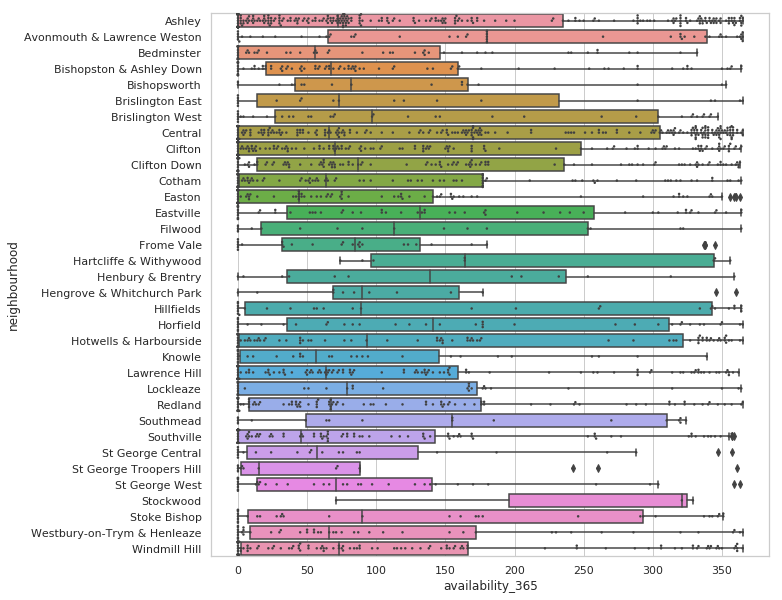

In [201]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=df.availability_365, y=df.neighbourhood.sort_values(), orient='h')
ax = sns.swarmplot(x=df.availability_365, y=df.neighbourhood.sort_values(), size=2.5, color=".25")

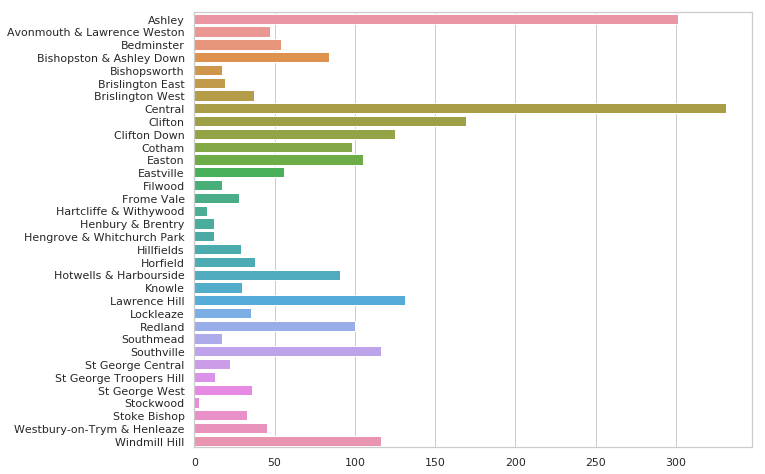

In [202]:
plt.figure(figsize=(10,8))
from collections import Counter
cnt = Counter(df.neighbourhood.sort_values())
ax = sns.barplot(x=list(cnt.values()), y=list(cnt.keys()))

In [87]:
len(set(df.neighbourhood))

34

In [80]:
len(df[df.room_type == 'Entire home/apt'])

1241

In [79]:
set(df.room_type)

{'Entire home/apt', 'Private room', 'Shared room'}

In [72]:
df[df.host_id == 360195]

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4,51.439942,-2.591726,Townhouse,Private room,...,2.10,96,10,9,10,10.0,10.0,10.0,5,44
55,1524396,Woodburner - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4LJ,51.439933,-2.591851,Townhouse,Private room,...,2.07,96,10,9,10,10.0,9.0,10.0,5,14
56,1536968,Blanket Box - Sarah's large Room,360195,Sarah,Windmill Hill,BS3 4LJ,51.440493,-2.592200,Townhouse,Private room,...,2.26,96,10,10,10,10.0,10.0,10.0,5,40
287,8578293,"City View, Woodburner or Blanket Box room.",360195,Sarah,Windmill Hill,NaN,51.440235,-2.591736,Townhouse,Private room,...,0.68,98,10,10,10,10.0,10.0,10.0,5,7
2102,27622534,"Woodburner, City View or Blanket box room",360195,Sarah,Windmill Hill,England,51.439032,-2.591000,Townhouse,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,37


In [51]:
df.accommodates = pd.to_numeric(df.accommodates, errors='coerce', downcast='signed')
df = df.dropna(subset=['accommodates'])

In [53]:
df.bathrooms = pd.to_numeric(df.bathrooms, errors='coerce')
df = df.dropna(subset=['bathrooms'])

In [56]:
df.bedrooms = pd.to_numeric(df.bedrooms, errors='coerce', downcast='signed')
df = df.dropna(subset=['bedrooms'])

In [66]:
df.beds = pd.to_numeric(df.beds, errors='coerce', downcast='signed')
df = df.dropna(subset=['beds'])

In [70]:
df[df.review_scores_rating.isnull()]

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
58,1608917,Double bedroom in Bristol,8568332,Lynn,Bishopsworth,BS13 7JR,51.416062,-2.618383,Bed and breakfast,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
86,3171080,The Spare Room,3039024,Alice,Ashley,BS2 9LG,51.464425,-2.580977,House,Private room,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,32
114,3960179,FABULOUS!!!,20522861,Peter,Avonmouth & Lawrence Weston,BS9,51.496993,-2.646597,House,Entire home/apt,...,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,180
126,4415577,Modern Clifton Town House Flat,14393496,Polly And Robin,Clifton Down,BS8 2NH,51.464189,-2.608832,Apartment,Entire home/apt,...,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
129,4474040,"Double, and Two single rooms available in West...",23213540,Julia,Westbury-on-Trym & Henleaze,BS9 3PL,51.495202,-2.634404,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,365
166,5884754,Cozy Modern Cottage in Brislington\n,22532990,Byron,Brislington East,BS4 4PU,51.438332,-2.546288,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,365
199,6613273,DINGLE CORNER,34607760,Peter,Avonmouth & Lawrence Weston,BS9 2QN,51.495453,-2.649067,House,Entire home/apt,...,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,180
208,6876686,"Spacious house on hill, views over central Bri...",36036092,Rachel,Windmill Hill,BS3 5BY,51.437059,-2.580146,House,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
212,6944644,Double room From 17 to 28 February,36413611,Maria,Ashley,BS6 5LN,51.466208,-2.581103,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
221,7138129,Green Room at Kings Weston House,25679441,Josh,Avonmouth & Lawrence Weston,BS11 0UR,51.495323,-2.660850,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [92]:
len(df[df.property_type == '-2.5851114426'])

1

In [45]:
df.hist(column='neighbourhood')

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
38,996270,Cosy Room in Victorian Terrace,4341765,Patricia,St George Central,NaN,51.459770,-2.539083,t,Private room,...,0.46,2018-05-11,97,10,10,10.0,10.0,9.0,4,267
110,3896013,"City Centre Room, Bathroom, Parking",19817019,Benjamin,Central,England,51.459440,-2.591618,t,Private room,...,2.80,2018-08-30,96,10,9,10.0,10.0,10.0,1,43
164,5752786,Big 4 poster bedroom with shower on Gloucester Rd,29674675,Prue,Bishopston & Ashley Down,NaN,51.475441,-2.589990,t,Private room,...,3.25,2018-11-03,94,10,10,10.0,10.0,10.0,6,322
219,7120612,Pill Harbourside double bedroom,19909822,Alan,Avonmouth & Lawrence Weston,Bristol,51.481723,-2.683206,t,Private room,...,0.30,2018-10-12,100,10,10,10.0,10.0,10.0,1,365
247,7900542,Spacious room in Victorian house,40009065,Jim & Lin,Bishopston & Ashley Down,NaN,51.478195,-2.583085,t,Private room,...,2.77,2018-11-11,97,10,10,10.0,10.0,10.0,2,66
259,8142384,Charming loft room with own shower,41369557,Jonathan,Ashley,NaN,51.469854,-2.588208,t,Private room,...,0.03,2015-09-05,NaN,NaN,NaN,NaN,NaN,NaN,1,289
280,8529713,"Stunning House, Amazing Views, Kid Friendly",7862664,James,Ashley,NaN,51.469048,-2.585900,t,Entire home/apt,...,0.32,2018-04-07,88,9,9,10.0,10.0,10.0,1,108
390,11202609,Comfortable Double Room,32049470,Verity,Clifton Down,NaN,51.460545,-2.608958,t,Private room,...,0.30,2018-11-03,74,7,7,8.0,8.0,9.0,10,302
398,11348959,Cosy Room for Single Occupancy,32049470,Verity,Clifton Down,NaN,51.458702,-2.612356,t,Private room,...,0.23,2018-09-18,74,8,9,9.0,9.0,9.0,10,363
600,14101667,"Stylish Maisonette, Gloucester Road",17097148,Charley,Bishopston & Ashley Down,England,51.482231,-2.587497,f,Entire home/apt,...,0.54,2018-08-16,99,10,10,10.0,10.0,10.0,1,39


In [75]:
df[df.accommodates == 1]

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
9,389944,Spacious Cosy Room,1950884,Sonia,Redland,bs7 8py,51.479706,-2.591490,House,Private room,...,1.25,93,10,10,10,10.0,9.0,9.0,5,8
10,390781,Cosy large room near TV studios & Paintworks,1954565,Fi,Brislington West,BS4 3QA,51.444294,-2.557774,House,Private room,...,0.32,99,10,10,10,10.0,10.0,10.0,2,69
11,391612,Central Cosy Double Room House1,1958566,Carmen,Ashley,BS2 9QJ,51.464865,-2.579892,House,Private room,...,0.20,91,9,9,10,10.0,9.0,9.0,2,261
12,391613,Single Central Bristol Room House 1,1958566,Carmen,Ashley,BS2 9QJ,51.464992,-2.578263,House,Private room,...,0.61,86,8,9,9,9.0,7.0,9.0,2,320
13,392215,"home from home, large double, light",1961385,Bea,Brislington East,BS4 4QZ,51.441115,-2.536829,Townhouse,Private room,...,0.28,100,10,10,10,10.0,10.0,10.0,2,0
14,392217,"home from home, lovely single room",1961385,Bea,Brislington East,BS4 4QZ,51.442931,-2.537776,House,Private room,...,0.21,95,10,10,10,10.0,9.0,10.0,2,73
32,870076,Cosy Single Bedroom in Southville,3647954,Cath,Southville,BS3 1PR,51.445933,-2.603092,House,Private room,...,1.88,92,10,9,10,10.0,9.0,9.0,2,328
33,897555,Cosy nicely lit room in Bedminster,3271882,Gwen,Southville,BS3 4NE,51.441605,-2.598635,House,Private room,...,1.75,91,9,9,9,9.0,9.0,9.0,2,357
39,1033484,Tranquil Room near City Centre,5687726,Joanne,Ashley,BS2 9LJ,51.463068,-2.579818,House,Private room,...,3.99,97,10,10,10,10.0,9.0,10.0,2,344
51,1457693,Cosy single room with breakfast,4577089,Rohan,Eastville,BS5 6RR,51.473707,-2.546020,Bed and breakfast,Private room,...,0.14,85,9,9,10,10.0,9.0,8.0,2,221


In [76]:
df.loc[df.accommodates == 1]

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
9,389944,Spacious Cosy Room,1950884,Sonia,Redland,bs7 8py,51.479706,-2.591490,House,Private room,...,1.25,93,10,10,10,10.0,9.0,9.0,5,8
10,390781,Cosy large room near TV studios & Paintworks,1954565,Fi,Brislington West,BS4 3QA,51.444294,-2.557774,House,Private room,...,0.32,99,10,10,10,10.0,10.0,10.0,2,69
11,391612,Central Cosy Double Room House1,1958566,Carmen,Ashley,BS2 9QJ,51.464865,-2.579892,House,Private room,...,0.20,91,9,9,10,10.0,9.0,9.0,2,261
12,391613,Single Central Bristol Room House 1,1958566,Carmen,Ashley,BS2 9QJ,51.464992,-2.578263,House,Private room,...,0.61,86,8,9,9,9.0,7.0,9.0,2,320
13,392215,"home from home, large double, light",1961385,Bea,Brislington East,BS4 4QZ,51.441115,-2.536829,Townhouse,Private room,...,0.28,100,10,10,10,10.0,10.0,10.0,2,0
14,392217,"home from home, lovely single room",1961385,Bea,Brislington East,BS4 4QZ,51.442931,-2.537776,House,Private room,...,0.21,95,10,10,10,10.0,9.0,10.0,2,73
32,870076,Cosy Single Bedroom in Southville,3647954,Cath,Southville,BS3 1PR,51.445933,-2.603092,House,Private room,...,1.88,92,10,9,10,10.0,9.0,9.0,2,328
33,897555,Cosy nicely lit room in Bedminster,3271882,Gwen,Southville,BS3 4NE,51.441605,-2.598635,House,Private room,...,1.75,91,9,9,9,9.0,9.0,9.0,2,357
39,1033484,Tranquil Room near City Centre,5687726,Joanne,Ashley,BS2 9LJ,51.463068,-2.579818,House,Private room,...,3.99,97,10,10,10,10.0,9.0,10.0,2,344
51,1457693,Cosy single room with breakfast,4577089,Rohan,Eastville,BS5 6RR,51.473707,-2.546020,Bed and breakfast,Private room,...,0.14,85,9,9,10,10.0,9.0,8.0,2,221


KeyboardInterrupt: 

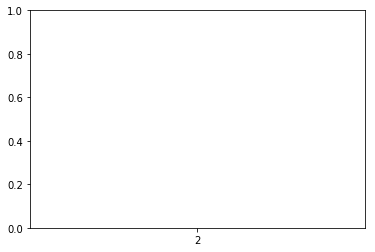

In [28]:
import numpy as np
import math
from matplotlib import pyplot as plt

plt.hist(df.accommodates)
plt.title('Title')
plt.xlabel('x label (20 evenly spaced bins)')
plt.ylabel('y label')

plt.show()

In [67]:
df.isnull().any().any()

True

In [73]:
df[df.accommodates.isnull()]

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
38,996270,Cosy Room in Victorian Terrace,4341765,Patricia,St George Central,NaN,51.459770,-2.539083,t,Private room,...,0.46,2018-05-11,97,10,10,10.0,10.0,9.0,4,267
110,3896013,"City Centre Room, Bathroom, Parking",19817019,Benjamin,Central,England,51.459440,-2.591618,t,Private room,...,2.80,2018-08-30,96,10,9,10.0,10.0,10.0,1,43
164,5752786,Big 4 poster bedroom with shower on Gloucester Rd,29674675,Prue,Bishopston & Ashley Down,NaN,51.475441,-2.589990,t,Private room,...,3.25,2018-11-03,94,10,10,10.0,10.0,10.0,6,322
219,7120612,Pill Harbourside double bedroom,19909822,Alan,Avonmouth & Lawrence Weston,Bristol,51.481723,-2.683206,t,Private room,...,0.30,2018-10-12,100,10,10,10.0,10.0,10.0,1,365
247,7900542,Spacious room in Victorian house,40009065,Jim & Lin,Bishopston & Ashley Down,NaN,51.478195,-2.583085,t,Private room,...,2.77,2018-11-11,97,10,10,10.0,10.0,10.0,2,66
259,8142384,Charming loft room with own shower,41369557,Jonathan,Ashley,NaN,51.469854,-2.588208,t,Private room,...,0.03,2015-09-05,NaN,NaN,NaN,NaN,NaN,NaN,1,289
280,8529713,"Stunning House, Amazing Views, Kid Friendly",7862664,James,Ashley,NaN,51.469048,-2.585900,t,Entire home/apt,...,0.32,2018-04-07,88,9,9,10.0,10.0,10.0,1,108
390,11202609,Comfortable Double Room,32049470,Verity,Clifton Down,NaN,51.460545,-2.608958,t,Private room,...,0.30,2018-11-03,74,7,7,8.0,8.0,9.0,10,302
398,11348959,Cosy Room for Single Occupancy,32049470,Verity,Clifton Down,NaN,51.458702,-2.612356,t,Private room,...,0.23,2018-09-18,74,8,9,9.0,9.0,9.0,10,363
600,14101667,"Stylish Maisonette, Gloucester Road",17097148,Charley,Bishopston & Ashley Down,England,51.482231,-2.587497,f,Entire home/apt,...,0.54,2018-08-16,99,10,10,10.0,10.0,10.0,1,39


,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
9,389944,Spacious Cosy Room,1950884,Sonia,Redland,bs7 8py,51.479706,-2.591490,House,Private room,...,1.25,93,10,10,10,10.0,9.0,9.0,5,8
10,390781,Cosy large room near TV studios & Paintworks,1954565,Fi,Brislington West,BS4 3QA,51.444294,-2.557774,House,Private room,...,0.32,99,10,10,10,10.0,10.0,10.0,2,69
11,391612,Central Cosy Double Room House1,1958566,Carmen,Ashley,BS2 9QJ,51.464865,-2.579892,House,Private room,...,0.20,91,9,9,10,10.0,9.0,9.0,2,261
12,391613,Single Central Bristol Room House 1,1958566,Carmen,Ashley,BS2 9QJ,51.464992,-2.578263,House,Private room,...,0.61,86,8,9,9,9.0,7.0,9.0,2,320
13,392215,"home from home, large double, light",1961385,Bea,Brislington East,BS4 4QZ,51.441115,-2.536829,Townhouse,Private room,...,0.28,100,10,10,10,10.0,10.0,10.0,2,0
14,392217,"home from home, lovely single room",1961385,Bea,Brislington East,BS4 4QZ,51.442931,-2.537776,House,Private room,...,0.21,95,10,10,10,10.0,9.0,10.0,2,73
32,870076,Cosy Single Bedroom in Southville,3647954,Cath,Southville,BS3 1PR,51.445933,-2.603092,House,Private room,...,1.88,92,10,9,10,10.0,9.0,9.0,2,328
33,897555,Cosy nicely lit room in Bedminster,3271882,Gwen,Southville,BS3 4NE,51.441605,-2.598635,House,Private room,...,1.75,91,9,9,9,9.0,9.0,9.0,2,357
39,1033484,Tranquil Room near City Centre,5687726,Joanne,Ashley,BS2 9LJ,51.463068,-2.579818,House,Private room,...,3.99,97,10,10,10,10.0,9.0,10.0,2,344
51,1457693,Cosy single room with breakfast,4577089,Rohan,Eastville,BS5 6RR,51.473707,-2.546020,Bed and breakfast,Private room,...,0.14,85,9,9,10,10.0,9.0,8.0,2,221


In [ ]:
df[df.duplicated(subset='host_name')]

In [ ]:
df.drop(columns=['id', 'name', 'host_name'])

In [ ]:
df.describe()